## Data Science Capstone Final Project 



### 1. Abstract :
                    

### 2. Objective :

### 3. Data Preprocessing :
Pre-processing refers to the transformations applied to the data before feeding it to the algorithm. Data Preprocessing Includes Data Collection , Cleaning ,Conversion of features , Imputing missing data ,features standardizations , feature scaling and identify new potential features.

#### Available Data set
   For this article, I have used a Data From (Need to be added ) data set from You can download the final training and testing data set from here:           
                
Lets get started by importing important packages and the data set.

In [1]:
%pylab inline 
import pandas as pd
import numpy as np

from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
# special matplotlib argument for improved plots
from matplotlib import rcParams
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.tree import DecisionTreeClassifier
#import xgboost as xgb
#from xgboost.sklearn import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.utils.extmath import density

import sys
from time import time
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import learning_curve

Populating the interactive namespace from numpy and matplotlib


## Data loading and Data cleaning :
Data is loaded into the DataFrame. Then we have  this renamed All variables  for Better Understanding.
- Convert the Loan Status as Charged off as 1 and Fully repaid as 0 .
- Removing non numeric charaters from from Features like  $ , ',' ,! and other alphabets which are not suitable for data analasis.


In [2]:
# data uploded into the data frame  
loan_data_df  = pd.read_csv('LoansTrainingSet.csv')

#convert the loan status into number;
loan_data_df['flag'] = loan_data_df['Loan Status'].replace(['Charged Off' ,'Fully Paid'], 
                     [1, 0]) ;

# Rename All Columns :
loan_data =loan_data_df.rename(columns = {'Loan ID':'loan_id' ,\
                                          'Customer ID' :'customer_id' ,\
                                          'Loan Status' :'loan_status',\
                                          'Current Loan Amount' : 'current_loan_amount' ,\
                                          'Term' :'term',\
                                          'Credit Score':'credit_score' ,\
                                          'Years in current job' : 'years_in_current_job',\
                                          'Home Ownership' :'home_ownership' ,\
                                          'Annual Income' :'annual_income' ,\
                                          'Purpose' :'purpose',\
                                          'Monthly Debt' :'monthly_debt',\
                                          'Years of Credit History' :'years_of_credit_history' ,\
                                          'Months since last delinquent' :'months_since_last_delinquent',
                                          'Number of Open Accounts' : 'number_of_open_accounts' ,
                                          'Number of Credit Problems': 'number_of_credit_problems',
                                          'Current Credit Balance' : 'current_credit_balance' ,
                                          'Maximum Open Credit' :'maximum_open_credit',
                                          'Bankruptcies':'bankruptcies',
                                          'Tax Liens' :'tax_liens',
                                          'flag' :'defaulter_or_not'

                                           
                                           })





# Removing non numeric characters from the features columns
# This should be uncomment
loan_data['purpose'] =   map(lambda x: x.lower(), loan_data['purpose'])
#loan_data['monthly_debt'] = [x[1:] for x in loan_data['monthly_debt']]
#loan_data['monthly_debt'] = loan_data["monthly_debt"].str.replace(",", "").astype(float)
#loan_data = loan_data[loan_data['maximum_open_credit'] != '#VALUE!']
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256984 entries, 0 to 256983
Data columns (total 20 columns):
loan_id                         256984 non-null object
customer_id                     256984 non-null object
loan_status                     256984 non-null object
current_loan_amount             256984 non-null int64
term                            256984 non-null object
credit_score                    195308 non-null float64
years_in_current_job            256984 non-null object
home_ownership                  256984 non-null object
annual_income                   195308 non-null float64
purpose                         256984 non-null object
monthly_debt                    256984 non-null float64
years_of_credit_history         256984 non-null float64
months_since_last_delinquent    116601 non-null float64
number_of_open_accounts         256984 non-null int64
number_of_credit_problems       256984 non-null int64
current_credit_balance          256984 non-null int64
maximum_

In [3]:
# Drop few columns which are not necessary for Modelling data .

loan_data.drop('loan_id' , axis =1 , inplace=True)
loan_data.drop('customer_id',axis =1 , inplace=True)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256984 entries, 0 to 256983
Data columns (total 18 columns):
loan_status                     256984 non-null object
current_loan_amount             256984 non-null int64
term                            256984 non-null object
credit_score                    195308 non-null float64
years_in_current_job            256984 non-null object
home_ownership                  256984 non-null object
annual_income                   195308 non-null float64
purpose                         256984 non-null object
monthly_debt                    256984 non-null float64
years_of_credit_history         256984 non-null float64
months_since_last_delinquent    116601 non-null float64
number_of_open_accounts         256984 non-null int64
number_of_credit_problems       256984 non-null int64
current_credit_balance          256984 non-null int64
maximum_open_credit             256980 non-null float64
bankruptcies                    256455 non-null float64
tax_li

## Years in current job :  
We could leave 'years_in_current_job' as categorical data, but it shouldn't be treated as such or as ordinal data since the intervals are easy to determine. We can convert it into numerical data with a simple filter



In [4]:
loan_data.years_in_current_job.value_counts()
 

10+ years    78896
2 years      23462
< 1 year     21012
3 years      20659
5 years      17864
1 year       16746
4 years      16166
6 years      14597
7 years      13968
8 years      12206
n/a          11476
9 years       9932
Name: years_in_current_job, dtype: int64

In [5]:
loan_data.replace('n/a', np.nan,inplace=True)
loan_data.years_in_current_job.fillna(value=0,inplace=True)
loan_data['years_in_current_job'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
loan_data['years_in_current_job'] = loan_data['years_in_current_job'].astype(int)
loan_data.years_in_current_job.value_counts()


10    78896
1     37758
2     23462
3     20659
5     17864
4     16166
6     14597
7     13968
8     12206
0     11476
9      9932
Name: years_in_current_job, dtype: int64

Let us analyze the purpose columns and analyze it impacts

In [6]:
print loan_data.purpose.value_counts()
print ''


debt consolidation      203911
other                    23935
home improvements        14915
business loan             4712
buy a car                 3276
medical bills             2868
take a trip               1570
buy house                 1530
educational expenses       267
Name: purpose, dtype: int64



#### Encoding categorical features :

We have 4 Categorical features .Purpose , Term , home_ownership ,years_in_current_job . We will convert them into distinct features using  one hot encoding method and later we will drop the parent column.Before drop this let us understand what is the impact of this features into the data .

In [7]:
def calculate_percentage(r ) :
    return r *100 / len(loan_data)

def one_hot_encoding(df, colname ) :
    df[colname] =  df[colname].str.lower()
    df[colname] =  df[colname].str.replace(" " ,"_")
    df = pd.concat([df, pd.get_dummies(df[colname]).rename(columns=lambda x:   str(x))], axis=1) 
    df.drop(colname,axis =1 , inplace=True)
    
    return df


pd.crosstab(loan_data["loan_status"],loan_data["purpose"] ).apply(calculate_percentage)






purpose,business loan,buy a car,buy house,debt consolidation,educational expenses,home improvements,medical bills,other,take a trip
loan_status,,,,,,,,,
Charged Off,0.841298,0.270834,0.173941,24.979765,0.031909,1.582978,0.375899,2.989291,0.193008
Fully Paid,0.992280,1.003954,0.421427,54.367976,0.071989,4.220885,0.740124,6.324518,0.417925


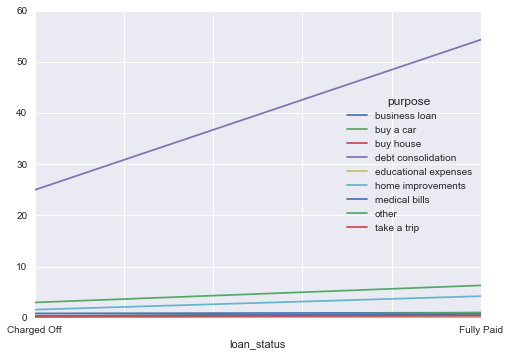

In [8]:
pd.crosstab(loan_data["loan_status"],loan_data["purpose"] ).apply(calculate_percentage).plot()


In [9]:
loan_data =  one_hot_encoding(loan_data, 'purpose' )
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256984 entries, 0 to 256983
Data columns (total 26 columns):
loan_status                     256984 non-null object
current_loan_amount             256984 non-null int64
term                            256984 non-null object
credit_score                    195308 non-null float64
years_in_current_job            256984 non-null int32
home_ownership                  256984 non-null object
annual_income                   195308 non-null float64
monthly_debt                    256984 non-null float64
years_of_credit_history         256984 non-null float64
months_since_last_delinquent    116601 non-null float64
number_of_open_accounts         256984 non-null int64
number_of_credit_problems       256984 non-null int64
current_credit_balance          256984 non-null int64
maximum_open_credit             256980 non-null float64
bankruptcies                    256455 non-null float64
tax_liens                       256961 non-null float64
defaul

Similarly we can Convert term , home_ownership into categorical variables. and before this let us obseve the pattern 
of the data and observe the trends .


In [10]:
pd.crosstab(loan_data["loan_status"],loan_data["term"] ).apply(calculate_percentage)

term,Long Term,Short Term
loan_status,,
Charged Off,11.569981,19.868941
Fully Paid,13.471267,55.089811


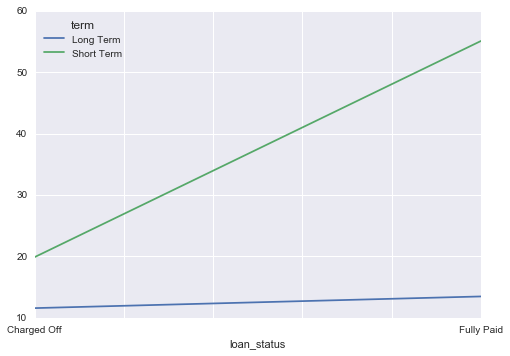

In [11]:
pd.crosstab(loan_data["loan_status"],loan_data["term"] ).apply(calculate_percentage).plot()

In [12]:
pd.crosstab(loan_data["loan_status"],loan_data["home_ownership"] ).apply(calculate_percentage)


home_ownership,HaveMortgage,Home Mortgage,Own Home,Rent
loan_status,,,,
Charged Off,0.058369,13.685677,2.914189,14.780687
Fully Paid,0.164991,34.751969,6.005821,27.638297


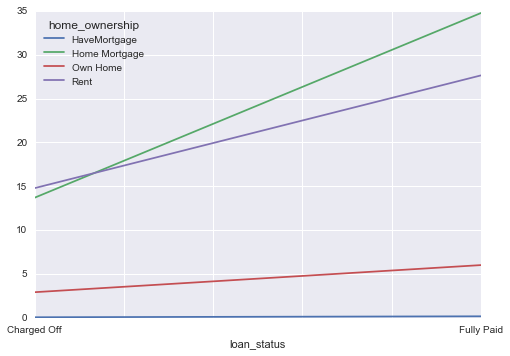

In [13]:
pd.crosstab(loan_data["loan_status"],loan_data["home_ownership"] ).apply(calculate_percentage).plot()

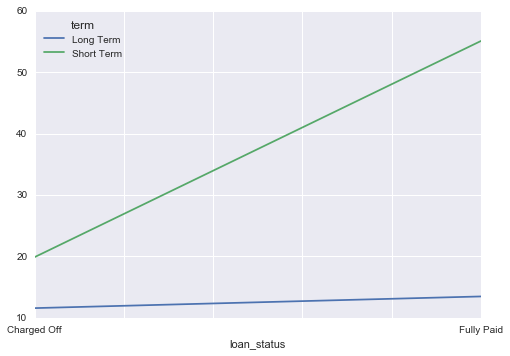

In [14]:
pd.crosstab(loan_data["loan_status"],loan_data["term"] ).apply(calculate_percentage).plot()


In [15]:
loan_data =  one_hot_encoding(loan_data, 'term' ) ;
loan_data = one_hot_encoding(loan_data, 'home_ownership' ) ;
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 256984 entries, 0 to 256983
Data columns (total 30 columns):
loan_status                     256984 non-null object
current_loan_amount             256984 non-null int64
credit_score                    195308 non-null float64
years_in_current_job            256984 non-null int32
annual_income                   195308 non-null float64
monthly_debt                    256984 non-null float64
years_of_credit_history         256984 non-null float64
months_since_last_delinquent    116601 non-null float64
number_of_open_accounts         256984 non-null int64
number_of_credit_problems       256984 non-null int64
current_credit_balance          256984 non-null int64
maximum_open_credit             256980 non-null float64
bankruptcies                    256455 non-null float64
tax_liens                       256961 non-null float64
defaulter_or_not                256984 non-null int64
business_loan                   256984 non-null float64
buy_a_

## months_since_last_delinquent :
    Let us now compare the delinquent distribution accross all applicants .
    

In [16]:
## Need to add here 

We need to fill the missed Values before we start farther exploration of Data

### Drop Unnecessray Columns

- We have found two columns which is not necessary for our Analysis. There for we dropped this column from our analysis .

In [17]:
## Imputations of Missing Values :

loan_data['annual_income'].fillna((loan_data['annual_income'].mean()), inplace=True)
loan_data['months_since_last_delinquent'].fillna((loan_data['months_since_last_delinquent'].mean()), inplace=True)
loan_data['credit_score'].fillna((loan_data['credit_score'].mean()), inplace=True)
loan_data['bankruptcies'].fillna((loan_data['bankruptcies'].median()), inplace=True)
loan_data['tax_liens'].fillna((loan_data['tax_liens'].median()), inplace=True)
loan_data['maximum_open_credit'].fillna((0), inplace=True)



### 4.Exploratory Data Analaysis

### 5.Our Model :
if we walk through the broken out steps above you'll find that we have:
   1. ddressed missing data
   2. onverted strings to numerical representations where possible
   3. Dropped superfluous attributes
   
   
We have to pay special attention to how we replace missing values since we can introduce bias if the data is not missing at random. he usual next steps are to:
 4. Eliminate zero (or near-zero) variance predictors
 5. Highly and correlated predictors
 

In [18]:
cor = loan_data.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

bankruptcies  number_of_credit_problems    0.755787
tax_liens     number_of_credit_problems    0.584912
other         debt_consolidation          -0.628169
short_term    long_term                   -1.000000
havemortgage  take_a_trip                  0.603477
rent          home_mortgage               -0.831889
dtype: float64

In [19]:
loan_data.drop(['bankruptcies','tax_liens','other', 'take_a_trip', 'short_term', 'home_mortgage'], axis=1, inplace=True)

In [20]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256984 entries, 0 to 256983
Data columns (total 24 columns):
loan_status                     256984 non-null object
current_loan_amount             256984 non-null int64
credit_score                    256984 non-null float64
years_in_current_job            256984 non-null int32
annual_income                   256984 non-null float64
monthly_debt                    256984 non-null float64
years_of_credit_history         256984 non-null float64
months_since_last_delinquent    256984 non-null float64
number_of_open_accounts         256984 non-null int64
number_of_credit_problems       256984 non-null int64
current_credit_balance          256984 non-null int64
maximum_open_credit             256984 non-null float64
defaulter_or_not                256984 non-null int64
business_loan                   256984 non-null float64
buy_a_car                       256984 non-null float64
buy_house                       256984 non-null float64
debt_c

In [21]:
loan_data.drop(['loan_status'], axis=1, inplace=True)

### Preparation of Test and Train Data :
1. We first seperate features and target .
2. Devide the data set into test and train set .

In [22]:
features = list(loan_data.columns)
features.remove('defaulter_or_not');

target =  'defaulter_or_not'


X =  loan_data[list(features)].values
y = loan_data[target].values



train_X, test_X, train_Y, test_Y =  train_test_split(X, y, test_size= .5, random_state=0)





Now We have Created some method for Benchmarking our classifier and Evaluate model to compare different parameter .

In [23]:
# Benchmark classifiers
def benchmark(clf, name ):

    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    if name == "XGboost Classifier" :
        clf.fit(train_X, train_Y ,eval_metric='auc' )
    else :
        clf.fit(train_X, train_Y)
            
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)
    print()
    t0 = time()
    y_pred = clf.predict(test_X)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
    
    score = metrics.accuracy_score(test_Y, y_pred)
    print("accuracy:   %0.3f" % score)
    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))
    roc = roc_auc_score(test_Y, y_pred)
    print ("AUC Score (Roc): %0.3f" % roc )
    recall = recall_score(test_Y, y_pred)

    print ("recall score :%0.3f " % recall )
    f1 = f1_score(test_Y, y_pred) 
    print ("F1 score :%0.3f"  %  f1 )
    precision = precision_score(test_Y, y_pred)
    print (  "Precision score : %0.3f " % precision )
    
    clf_descr = str(clf).split('(')[0]
    return clf_descr,score , train_time ,test_time , roc ,  recall , f1, precision  

In [24]:
def calculate_fpr_tpr (clf , name ) :
    
    if name == "XGboost Classifier" :
        clf.fit(train_X, train_Y ,eval_metric='auc' )
    else :
        clf.fit(train_X, train_Y)
    
    
    if hasattr(clf, "decision_function"):
        y_score = clf.decision_function(test_X)
    else:
        y_score = clf.predict_proba(test_X)[:, 1]
    
    
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes =  2
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_Y, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(test_Y.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    clf_descr = str(clf).split('(')[0]
    return clf_descr ,fpr , tpr , roc_auc 


In [25]:

import warnings
warnings.filterwarnings("ignore")
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.
        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
   
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.6,
                     color="dodgerblue")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.6, color="firebrick")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score" , alpha = .6 )
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score" , alpha = .6)

    plt.legend(loc="best")
    return plt

## Decision Trees :
   Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.
   
How does a tree decide where to split : 
   The decision of making strategic splits heavily affects a tree’s accuracy. Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable. Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.  
   
   Gini Index :
   if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure.
   
   Chi-Square :
   It is an algorithm to find out the statistical significance between the differences between sub-nodes and parent node. We measure it by sum of squares of standardized differences between observed and expected frequencies of target variable.
   
   Information Gain:
   Look at the image below and think which node can be described easily. I am sure, your answer is C because it requires less information as all values are similar.
   
   Reduction in Variance :
   Till now, we have discussed the algorithms for categorical target variable. Reduction in variance is an algorithm used for continuous target variables (regression problems). This algorithm uses the standard formula of variance to choose the best split. The split with lower variance is selected as the criteria to split the population:
   
   \begin{equation*}
   varience = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \mu)^2} {n}
   \end{equation*}
   

In [26]:
clf = DecisionTreeClassifier(criterion =  "entropy" , min_samples_split = 2\
                             ,max_depth= 5 ,max_leaf_nodes = 20 ,min_samples_leaf = 1 )
name =  "Decision Tree Classifier"
print('=' * 80)
benchmark(clf ,name )




param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }


grid_search = GridSearchCV(clf,param_grid=param_grid,cv= 5)
start = time() ;
grid_search.fit(X, y) ;
grid_search.best_params_ ;



________________________________________________________________________________
Training: 
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=20, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
train time: 1.558s
()
test time:  0.024s
accuracy:   0.757
AUC Score (Roc): 0.641
recall score :0.328 
F1 score :0.459
Precision score : 0.762 


#### Train error vs Test error :
how the performance of an estimator on unseen data (test data) is not the same as the performance on training data.By using decision tree we have seen due to optimal use of Parameter we have found not that much significant differnce between test and train data .

#### Key parameters of tree modeling :
Overfitting is one of the key challenges faced while modeling decision trees. If there is no limit set of a decision tree, it will give you 100% accuracy on training set because in the worse case it will end up making 1 leaf for each observation. Thus, preventing overfitting is pivotal while modeling a decision tree and it can be done in 2 ways:

1. Setting constraints on tree size
2. Tree pruning


<module 'matplotlib.pyplot' from 'C:\Users\User\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

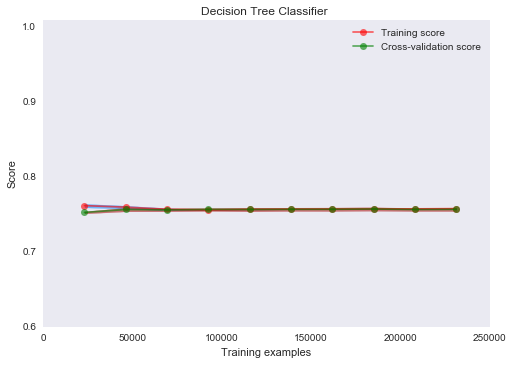

In [27]:


plt.figure(figsize=(14, 6)).subplots_adjust(wspace=.3)
title = "Decision Tree Classifier "
plot_learning_curve(clf, title, X, y, ylim=(0.6, 1.01), cv=10, n_jobs = 4)


 

### Random Forest Classifier :
Random Forest is a versatile machine learning method capable of performing both regression and classification tasks. It also undertakes dimensional reduction methods, treats missing values, outlier values and other essential steps of data exploration, and does a fairly good job. It is a type of ensemble learning method, where a group of weak models combine to form a powerful model.
To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest) and in case of regression, it takes the average of outputs by different trees.

It works in the following manner. Each tree is planted & grown as follows:
   1. Assume number of cases in the training set is N. Then, sample of these N cases is taken at random but with replacement. This sample will be the training set for growing the tree.
   2. If there are M input variables, a number m<M is specified such that at each node, m variables are selected at random out of the M. The best split on these m is used to split the node. The value of m is held constant while we grow the forest.
   3. Each tree is grown to the largest extent possible and  there is no pruning.
   4. Predict new data by aggregating the predictions of the ntree trees (i.e., majority votes for classification, average for regression).

#### Advantages of Random Forest :
- One of benefits of Random forest which excites me most is, the power of handle large data set with higher dimensionality. It can handle thousands of input variables and identify most significant variables so it is considered as one of the dimensionality reduction methods.
- It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing.
- The capabilities of the above can be extended to unlabeled data, leading to unsupervised clustering, data views and outlier detection.

#### Disadvantages of Random Forest

- It surely does a good job at classification but not as good as for regression problem as it does not give precise continuous nature predictions.
- In case of regression, it doesn’t predict beyond the range in the training data, and that they may over-fit data sets that are particularly noisy.
- Random Forest can feel like a black box approach for statistical modelers – you have very little control on what the model does. You can at best – try different parameters and random seeds!

   


In [ ]:
clf1 = RandomForestClassifier(n_estimators=20)
name =  "Random Forest Classifier"
print('=' * 80)
benchmark(clf1 ,name )


In [ ]:
plt.figure(figsize=(14, 6)).subplots_adjust(wspace=.3)
title = "Random Forest Classifier Learning curve "
plot_learning_curve(clf1, title, X, y, ylim=(0.6, 1.01), cv=10, n_jobs = 4)

### 6.Evaluation Metrics

 ### 7.Cost and Benifit Analysis